<a href="https://colab.research.google.com/github/sky309/Global-Terrorism-Analysis/blob/main/CH_Sarvesh_Kumar_Yadav_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# TO import mostly used visualization librarues
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
#To show the large file
pd.set_option('display.max_columns', None)

In [ ]:
#To mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To import statewise Indian Map file
indian_states= json.load(open('/content/drive/MyDrive/AlmaBetter/Modules/week3/09-06-2021-/Assignment/states_india.geojson','r'))

In [ ]:
#To locate the file in drive
file='/content/drive/MyDrive/AlmaBetter/Modules/week3/09-06-2021-/Assignment/Copy of Global Terrorism Data.csv'

In [ ]:
#To read the csv file
df= pd.read_csv(file, encoding= "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Analysis based on Indian Terrorist Group:
#1) Top terrorist prone cities  in India v/s number of attacks
#2) State  vs. Terrorist group
  # 3) Number of damages vs Type of Attacks
# 4) Number of Attacks happen in each year '''


In [ ]:
#To get the shape of Dataframe
df.shape

(181691, 135)

In [ ]:
#To get datafraem information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#To see the initial data
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
#Useless Columns are removed
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]

In [ ]:
#To rename the labels
sub_df.rename(columns={'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','provstat':'total_wou*nds','gname':'terrorist_group'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#New dataframe
sub_df


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


#Top terrorist prone cities in India v/s number of attacks


In [ ]:
#New Dataframe
sub_df

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


In [ ]:
# Dataframe for India only
df_India= sub_df[sub_df['country']=='India']
df_India

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA)
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People
...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist)
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM)
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front


In [ ]:
# To get the mode of cities
city_known = df_India[df_India['city']!='Unknown']
state_city=city_known[['state','city']]
city_mode=state_city.groupby('state')['city'].apply(lambda x: x.mode().loc[0])
city_mode=city_mode.reset_index()

In [ ]:
#To zip the city and state
dict_=dict(zip(city_mode.state,city_mode.city))
df_India['new_city']=df_India.city.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#To replace Unknown cities by Mode City of the state
for i,row in df_India.iterrows():
  if df_India.at[i,'state']!='Unknown':
    if df_India.at[i,'city']=='Unknown':
      df_India.at[i,'new_city']=dict_[row['state']]
    else:
      df_India.at[i,'new_city']=df_India.at[i,'new_city']

In [ ]:
#Indian cities without name as 'Unknown'
df_India['city']= df_India['new_city']
df_India

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group,new_city
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians,New Delhi
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga,Samastipur
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown,New Delhi
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA),Bombay
7337,197901130004,1979,India,South Asia,Assam,Guwahati,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People,Guwahati
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown,Koothuparamba
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist),Toylanka
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM),Lethapora
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front,Hungrum


In [ ]:
#dataframe for Indian cities vs. number of attacks
df_number_of_attacks_by_cities =df_India['city'].value_counts().rename_axis('unique_cities').reset_index(name='number_of_attacks')
df_sorted_city_by_attacks= df_number_of_attacks_by_cities.sort_values(['number_of_attacks'], ascending= False).reset_index(drop= True)

In [ ]:
df_sorted_city_by_attacks

,unique_cities,number_of_attacks
0,Srinagar,744
1,Imphal,477
2,Amritsar,293
3,Guwahati,174
4,New Delhi,157
...,...,...
4793,Barigaon,1
4794,Bhaini Gillan,1
4795,Ambari,1
4796,Anantang district,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


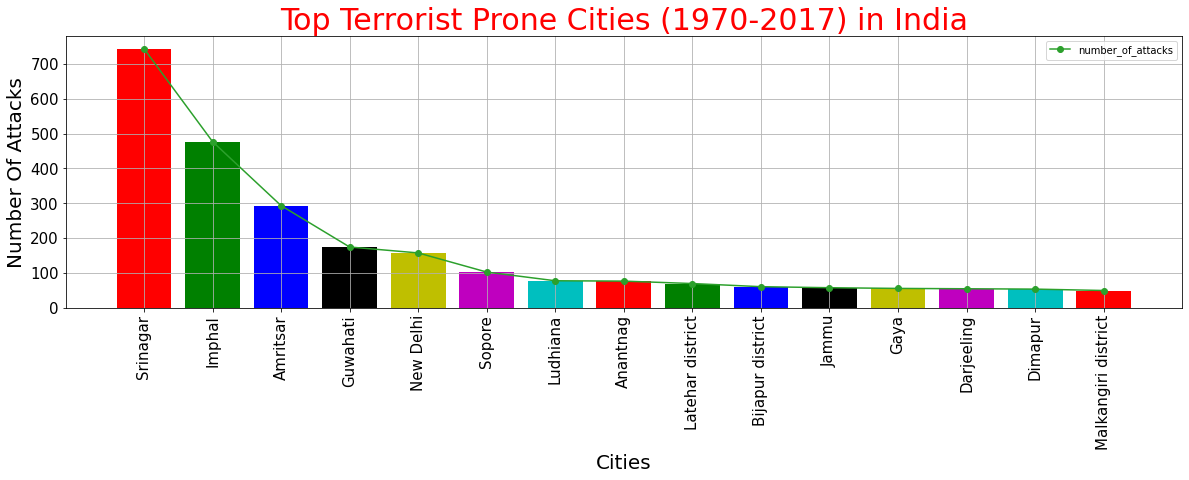

In [ ]:
# To plot bar graph For Most terrorist prone cities
plt.rcParams["figure.figsize"] = (20, 5)
df_sorted_city_by_attacks.head(15).plot(zorder=5,color='C2', marker='o')
a=plt.bar(df_sorted_city_by_attacks['unique_cities'].head(15),df_sorted_city_by_attacks['number_of_attacks'].head(15),color='rgbkymc')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('Cities', fontsize=20)
plt. ylabel('Number Of Attacks', fontsize=20)
plt.title("Top Terrorist Prone Cities (1970-2017) in India", fontsize= 30, color='r')
plt.grid()
plt.show()


# Conclusion: 
Top Terrorist Prone City is: **Srinagar** 

#Most Active Terrorist Group Statewise

In [ ]:
#New Data frame for statewise active terrorist group. Here Replacing State Name according to the name on Standard World map
df_India.replace('Orissa', 'Odisha', inplace= True)
df_India.replace('Jammu and Kashmir', 'Jammu & Kashmir', inplace= True)
df_India.replace('Andhra pradesh', 'Andhra Pradesh', inplace= True)
df_India.replace('Uttaranchal', 'Uttarakhand', inplace= True)
df_India.replace('Arunachal Pradesh', 'Arunanchal Pradesh', inplace= True)
df_India.replace('Delhi', 'NCT of Delhi', inplace= True)
indexNames = df_India[ df_India['state'] =='Unknown' ].index
df_India.drop(indexNames , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Dataframe for statewise terrorist group 
statewise_terrorist_attack_group=pd.DataFrame(df_India, columns=['state','terrorist_group','attack_type','total_kills' ])
active_group= statewise_terrorist_attack_group.groupby(['state','terrorist_group']).agg({'terrorist_group':'count'}).rename(columns={'terrorist_group':'number of attacks'}).reset_index()
most_active_group=active_group.groupby("state").max().reset_index()
most_active_terror_group_statewise= most_active_group.sort_values('number of attacks', ascending= False)
most_active_terror_group_statewise

,state,terrorist_group,number of attacks
10,Jammu & Kashmir,Unknown,1471
16,Manipur,Zomi Revolutionary Army (ZRA),680
5,Chhattisgarh,Vishwa Hindu Parishad (VHP),577
11,Jharkhand,Unknown,456
23,Punjab,Unknown,453
2,Assam,Zeliangrong United Front,338
3,Bihar,Unknown,324
21,Odisha,Vishwa Hindu Parishad (VHP),315
31,West Bengal,Unknown,277
17,Meghalaya,Unknown,160


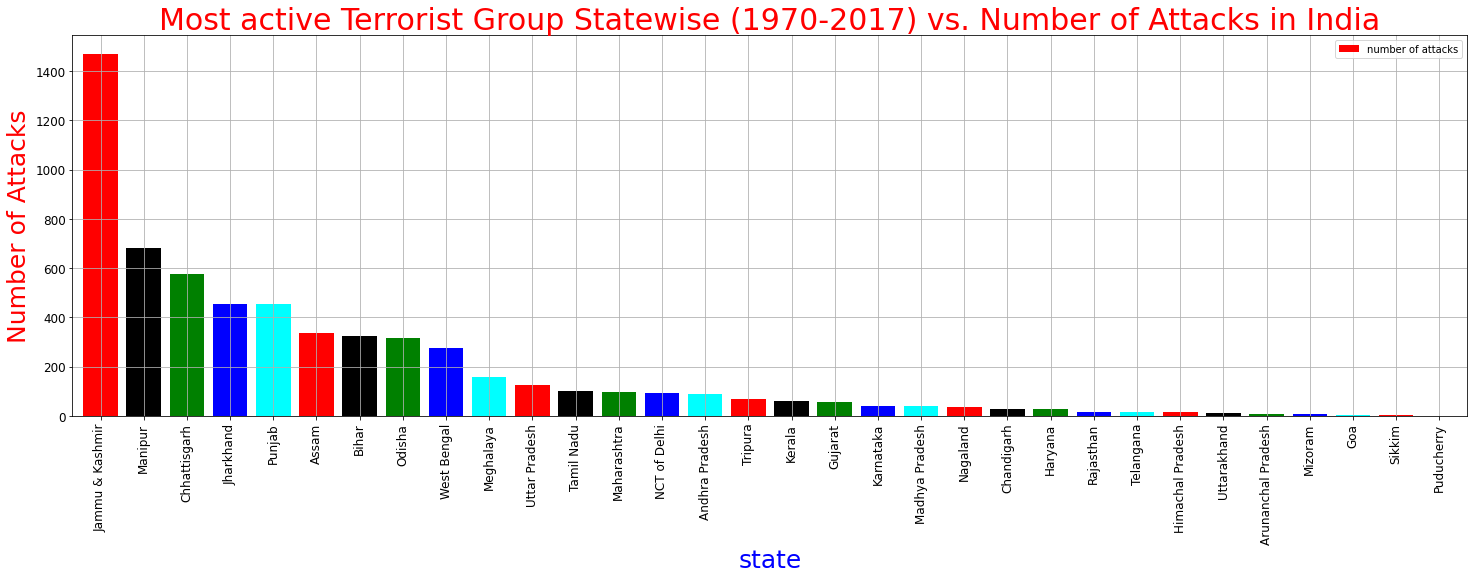

In [45]:
#Bar char to show statewise terrorist group and terrorist attacks
plt.rcParams["figure.figsize"] = (25, 7)
x1=most_active_terror_group_statewise['terrorist_group']
y=most_active_terror_group_statewise['number of attacks']
a=most_active_terror_group_statewise.plot(kind='bar',x='state',y='number of attacks', color=[ 'red', 'black','green', 'blue', 'cyan'], width=0.8)
plt. xlabel('state', fontsize=25, color='b')
plt. ylabel('Number of Attacks', fontsize=25, color='r')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Most active Terrorist Group Statewise (1970-2017) vs. Number of Attacks in India', fontsize=30, color= 'r')
plt.grid()

# Conclusion: 
1)Jammu and Kashmir has th highest number of attacks.

2)Most active terrorist group in Manipur is : Zomi Revolutionary Army (ZRA)	
3) Most active Terrorist Group in Chhattisgarh	is:Vishwa Hindu Parishad (VHP)	

# Total People killed vs Type of Attack



In [ ]:
#Sorted Data Frame for attack types vs, Number of People killed
terrorist_attack_group=pd.DataFrame(df_India, columns=['city','terrorist_group','attack_type','total_kills' ])
terrorist_attack_group.sort_values('total_kills', ascending= False)

,city,terrorist_group,attack_type,total_kills
81098,Mumbai,Lashkar-e-Taiba (LeT),Bombing/Explosion,188.0
54416,Bombay,Muslim Militants,Armed Assault,115.0
96726,Jhargam,Communist Party of India - Maoist (CPI-Maoist),Unknown,115.0
95988,Dantewada district,Communist Party of India - Maoist (CPI-Maoist),Armed Assault,82.0
56912,Banabari,Bodo Militants,Armed Assault,70.0
...,...,...,...,...
178963,Mellim,Unknown,Hostage Taking (Kidnapping),NaN
179197,Mon district,National Socialist Council of Nagaland-Khaplan...,Armed Assault,NaN
180345,Jhaldera,Maoists,Hostage Taking (Kidnapping),NaN
180370,Riangdim,Garo National Liberation Army,Hostage Taking (Kidnapping),NaN


In [ ]:
index_names = terrorist_attack_group[ terrorist_attack_group['terrorist_group'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)

In [ ]:
terrorist_attack_group

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0
7337,Guwahati,Naga People,Armed Assault,NaN
8174,Imphal,Meitei extremists,Armed Assault,4.0
...,...,...,...,...
181606,Sahajpur-Sahiyaar,Maoists,Facility/Infrastructure Attack,0.0
181612,Motbung,Manipur Naga People's Army (MNPA),Hostage Taking (Kidnapping),0.0
181665,Toylanka,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
181672,Lethapora,Jaish-e-Mohammad (JeM),Armed Assault,8.0


In [ ]:
# Removing type of attacks which are unknown
index_names = terrorist_attack_group[ terrorist_attack_group['attack_type'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
terrorist_attack_group

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0
7337,Guwahati,Naga People,Armed Assault,NaN
8174,Imphal,Meitei extremists,Armed Assault,4.0
...,...,...,...,...
181606,Sahajpur-Sahiyaar,Maoists,Facility/Infrastructure Attack,0.0
181612,Motbung,Manipur Naga People's Army (MNPA),Hostage Taking (Kidnapping),0.0
181665,Toylanka,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
181672,Lethapora,Jaish-e-Mohammad (JeM),Armed Assault,8.0


In [ ]:
# Soritng the data
attack_type_killings= terrorist_attack_group.groupby(['attack_type'])['total_kills'].sum().rename_axis('attack_type').reset_index(name='total_kills')
attack_type_killings.sort_values('total_kills', ascending= False)

,attack_type,total_kills
0,Armed Assault,6926.0
2,Bombing/Explosion,4006.0
1,Assassination,1197.0
6,Hostage Taking (Kidnapping),731.0
3,Facility/Infrastructure Attack,130.0
5,Hostage Taking (Barricade Incident),130.0
4,Hijacking,39.0
7,Unarmed Assault,21.0


Text(0.5, 1.0, 'Total People Killed (1970-2017) vs Terrorist Attack Type in India')

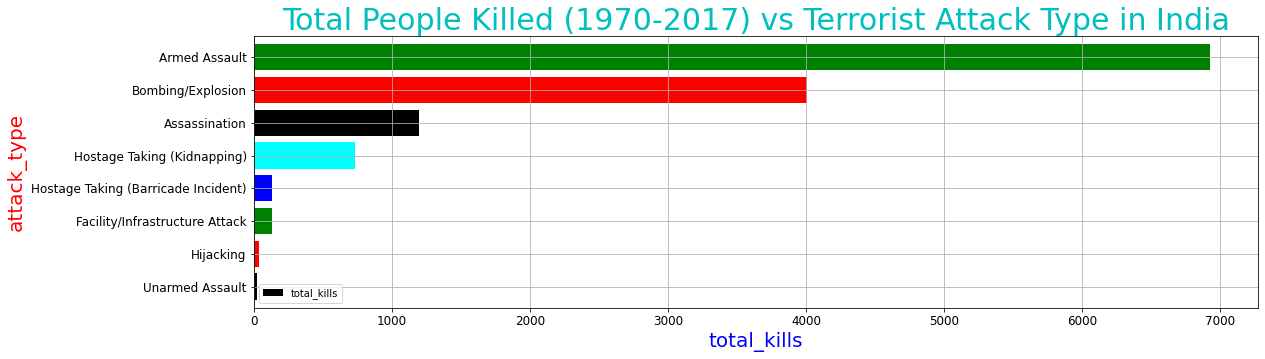

In [ ]:
#Plotting bar graph
plt.rcParams["figure.figsize"] = (18, 5)
attack_type_killings.sort_values('total_kills', ascending= True).plot(kind='barh',x='attack_type',y='total_kills', color=['black', 'red', 'green', 'blue', 'cyan'], width=0.8)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('total_kills', fontsize=20, color='b')
plt. ylabel('attack_type', fontsize=20, color='r')
plt.grid()
plt.title('Total People Killed (1970-2017) vs Terrorist Attack Type in India', fontsize=30, color='c')


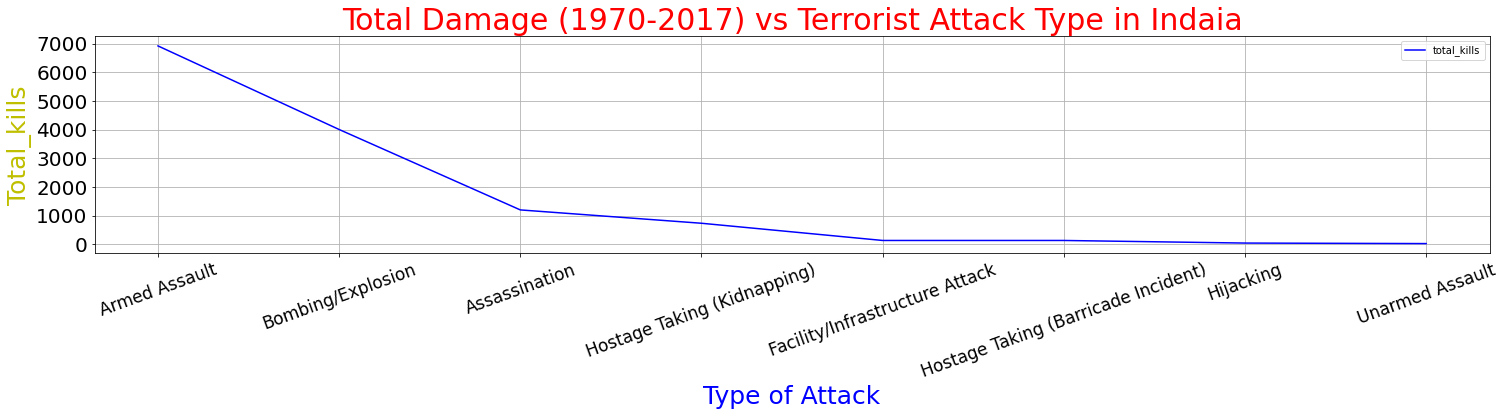

In [ ]:
# Shwoing same data on line chart
plt.rcParams["figure.figsize"] = (25, 4)
attack_type_killings.sort_values('total_kills', ascending= False).plot(x='attack_type',y='total_kills', color='b')
plt.yticks(fontsize=20)
plt.xticks(fontsize=17, rotation=20)
plt. xlabel('Type of Attack', fontsize=25, color='b')
plt. ylabel('Total_kills', fontsize=25, color='y')
plt.title('Total Damage (1970-2017) vs Terrorist Attack Type in Indaia', fontsize=30, color='r')
plt.grid()

#Conclusion:
1) Armed Assault has done higher amount(nearabout-7000 killings) of Damage